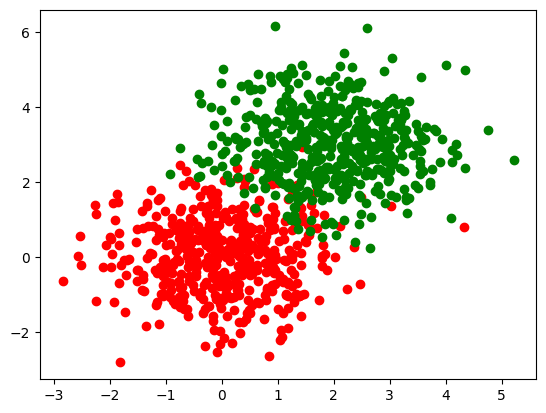

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


k = 2

N = 1000
D = 2

X1 = np.random.randn(int(N/2), D)
X2 = np.random.randn(int(N/2), D) + [2, 3]
X = np.concatenate((X1, X2), axis=0)

plt.scatter(X[:int(N/2), 0], X[:int(N/2), 1], c='r')
plt.scatter(X[int(N/2):, 0], X[int(N/2):, 1], c='g')

<ipython-input-4-d6530f03647b>:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(mus[ix, 0], mus[ix, 1], c=mucols[ix])


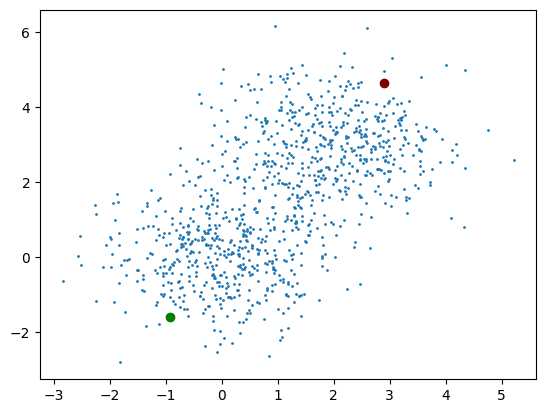

In [ ]:
av_pt = np.mean(X, axis=0)
var_pt = np.var(X, axis=0)

mus = np.zeros((k, D))
mus[0, :] = av_pt + var_pt
mus[1, :] = av_pt - var_pt


plt.scatter(X[:, 0], X[:, 1], s=1)
mucols = [[0.5, 0, 0], [0, 0.5, 0]]
cols = [[1, 0, 0], [0, 1, 0]]
for ix in range(k):
  plt.scatter(mus[ix, 0], mus[ix, 1], c=mucols[ix])


#plt.scatter(av_pt[0], av_pt[1], c='k')

In [ ]:
rnk = np.zeros((N, k))
for ix in range(N):
  rnk[ix, np.random.randint(2)] = 1

<ipython-input-6-f0accb3804c9>:4: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[cl1ixs, 0], X[cl1ixs, 1], c=cols[0])
<ipython-input-6-f0accb3804c9>:5: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[cl2ixs, 0], X[cl2ixs, 1], c=cols[1])


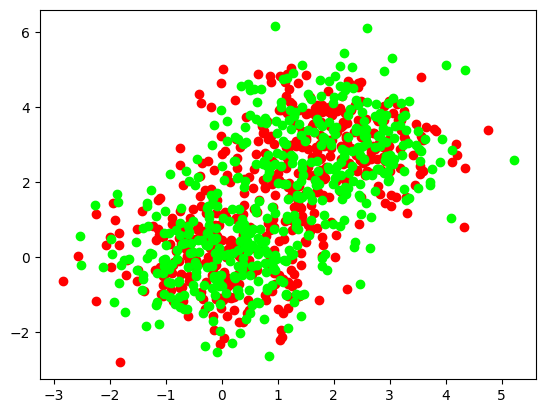

In [ ]:
cl1ixs = np.where(np.array(rnk[:, 0]==1, dtype='int'))[0]
cl2ixs = np.where(np.array(rnk[:, 1]==1, dtype='int'))[0]

plt.scatter(X[cl1ixs, 0], X[cl1ixs, 1], c=cols[0])
plt.scatter(X[cl2ixs, 0], X[cl2ixs, 1], c=cols[1])

<ipython-input-7-96c860213fe5>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[cl1ixs, 0], X[cl1ixs, 1], c=cols[0])
<ipython-input-7-96c860213fe5>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[cl2ixs, 0], X[cl2ixs, 1], c=cols[1])
<ipython-input-7-96c860213fe5>:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have pr

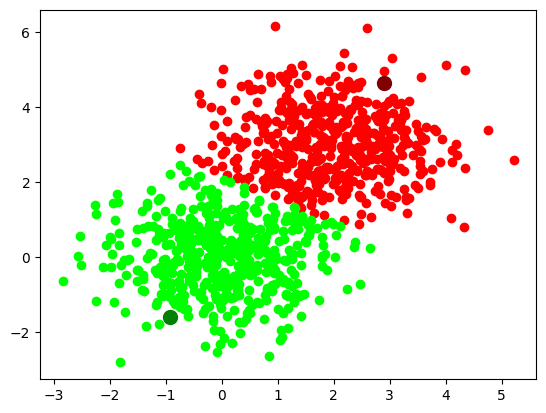

In [ ]:
import scipy.spatial.distance as dist


# EXPECTATION
dists = dist.cdist(X, mus)
rnk = 1 - np.argsort(dists, axis=1)

cl1ixs = np.where(np.array(rnk[:, 0]==1, dtype='int'))[0]
cl2ixs = np.where(np.array(rnk[:, 1]==1, dtype='int'))[0]

plt.scatter(X[cl1ixs, 0], X[cl1ixs, 1], c=cols[0])
plt.scatter(X[cl2ixs, 0], X[cl2ixs, 1], c=cols[1])
for ix in range(k):
  plt.scatter(mus[ix, 0], mus[ix, 1], s=100, c=mucols[ix])


<ipython-input-8-05a47dcda869>:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[cl1ixs, 0], X[cl1ixs, 1], c=cols[0])
<ipython-input-8-05a47dcda869>:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[cl2ixs, 0], X[cl2ixs, 1], c=cols[1])
<ipython-input-8-05a47dcda869>:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have pr

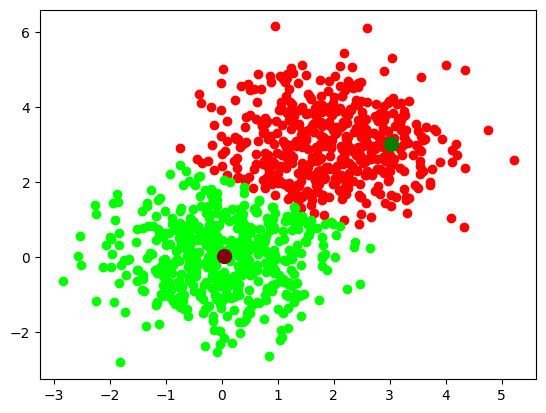

In [ ]:
# MAXIMIZATION

for ix in range(k): # for each class
  prototype = np.array([0.0, 0.0]) # initialize a prototype
  for d in range(D): # for each prototype's dimension
    c = 0.0 # initialize a counter
    for n in range(N): # for each data point
      if rnk[n, d] != ix: # if data point belongs to class ix
        c += 1 # increase a counter
        prototype[d] += X[n, d] # add it to prototype dim
    prototype[d] /= c
  #print(prototype)
  mus[ix, :] = prototype[d]

plt.scatter(X[cl1ixs, 0], X[cl1ixs, 1], c=cols[0])
plt.scatter(X[cl2ixs, 0], X[cl2ixs, 1], c=cols[1])
for ix in range(k):
  plt.scatter(mus[ix, 0], mus[ix, 1], s=100, c=mucols[ix])

<ipython-input-9-00c2aa523b2c>:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[cl1ixs, 0], X[cl1ixs, 1], c=cols[0])
<ipython-input-9-00c2aa523b2c>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[cl2ixs, 0], X[cl2ixs, 1], c=cols[1])
<ipython-input-9-00c2aa523b2c>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have prec

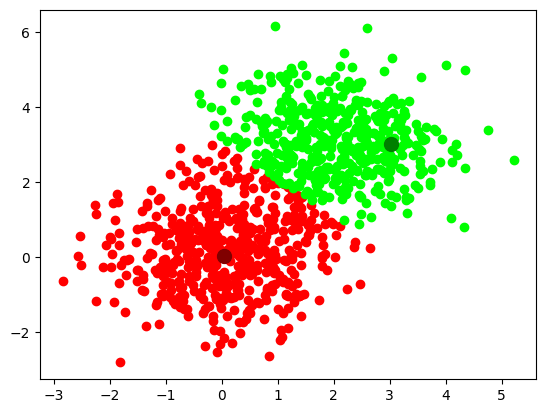

In [ ]:
# EXPECTATION
dists = dist.cdist(X, mus)
rnk = 1 - np.argsort(dists, axis=1)

cl1ixs = np.where(np.array(rnk[:, 0]==1, dtype='int'))[0]
cl2ixs = np.where(np.array(rnk[:, 1]==1, dtype='int'))[0]

plt.scatter(X[cl1ixs, 0], X[cl1ixs, 1], c=cols[0])
plt.scatter(X[cl2ixs, 0], X[cl2ixs, 1], c=cols[1])
for ix in range(k):
  plt.scatter(mus[ix, 0], mus[ix, 1], s=100, c=mucols[ix])

<ipython-input-10-df7f8cdbbe42>:5: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[cl1ixs, 0], X[cl1ixs, 1], c=cols[0])
<ipython-input-10-df7f8cdbbe42>:6: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[cl2ixs, 0], X[cl2ixs, 1], c=cols[1])
<ipython-input-10-df7f8cdbbe42>:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have pr

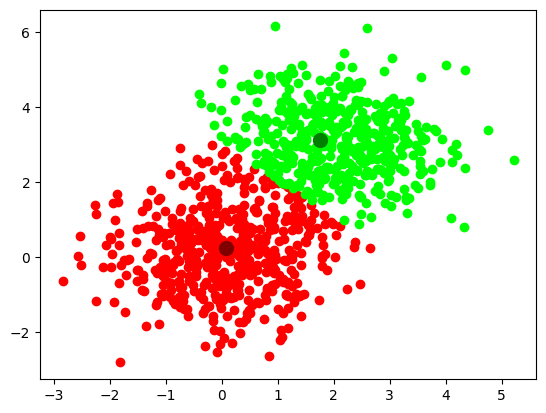

In [ ]:
# MAXIMIZATION

mus = rnk.T.dot(X) / np.sum(rnk, axis=0)

plt.scatter(X[cl1ixs, 0], X[cl1ixs, 1], c=cols[0])
plt.scatter(X[cl2ixs, 0], X[cl2ixs, 1], c=cols[1])
for ix in range(k):
  plt.scatter(mus[ix, 0], mus[ix, 1], s=100, c=mucols[ix])

<ipython-input-11-00c2aa523b2c>:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[cl1ixs, 0], X[cl1ixs, 1], c=cols[0])
<ipython-input-11-00c2aa523b2c>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[cl2ixs, 0], X[cl2ixs, 1], c=cols[1])
<ipython-input-11-00c2aa523b2c>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have p

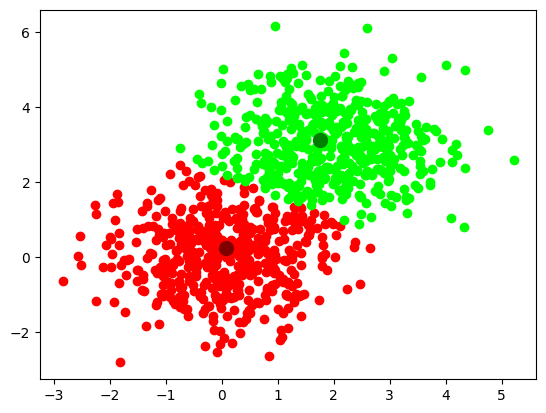

In [ ]:
# EXPECTATION
dists = dist.cdist(X, mus)
rnk = 1 - np.argsort(dists, axis=1)

cl1ixs = np.where(np.array(rnk[:, 0]==1, dtype='int'))[0]
cl2ixs = np.where(np.array(rnk[:, 1]==1, dtype='int'))[0]

plt.scatter(X[cl1ixs, 0], X[cl1ixs, 1], c=cols[0])
plt.scatter(X[cl2ixs, 0], X[cl2ixs, 1], c=cols[1])
for ix in range(k):
  plt.scatter(mus[ix, 0], mus[ix, 1], s=100, c=mucols[ix])

<ipython-input-12-28157d44f9d3>:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[cl1ixs, 0], X[cl1ixs, 1], c=cols[0])
<ipython-input-12-28157d44f9d3>:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[cl2ixs, 0], X[cl2ixs, 1], c=cols[1])
<ipython-input-12-28157d44f9d3>:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have

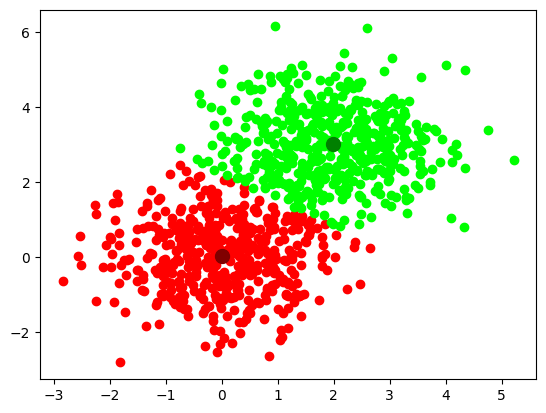

In [ ]:
nr_iterations = 10
for i in range(nr_iterations):
  # EXPECTATION
  dists = dist.cdist(X, mus)
  rnk = 1 - np.argsort(dists, axis=1)
  cl1ixs = np.where(np.array(rnk[:, 0]==1, dtype='int'))[0]
  cl2ixs = np.where(np.array(rnk[:, 1]==1, dtype='int'))[0]
  # MAXIMIZATION
  mus = rnk.T.dot(X) / np.sum(rnk, axis=0)



plt.scatter(X[cl1ixs, 0], X[cl1ixs, 1], c=cols[0])
plt.scatter(X[cl2ixs, 0], X[cl2ixs, 1], c=cols[1])
for ix in range(k):
  plt.scatter(mus[ix, 0], mus[ix, 1], s=100, c=mucols[ix])


In [ ]:
mus = rnk.T.dot(X) / np.sum(rnk, axis=0)
mus

array([[4.13142676e-04, 2.72574378e-02],
       [1.99047093e+00, 3.00290986e+00]])